# Implement some Python support functions

In [6]:
# !pip3 install matplotlib

import os,sys,boto3, time
from pprint import pprint


from nsdf.kernel import NormalizeEnv, SetEnv
env=NormalizeEnv({
	"include-vault": [
		"s3-wasabi",
	]
})

bucket="Pania_2021Q3_in_situ_data"

# ////////////////////////////////////////////////////////
def Connect():
	"""
	Function to connect to object storage with environment credentials
	"""
	session=boto3.session.Session()
	return session.client('s3',
		aws_access_key_id=os.environ["AWS_ACCESS_KEY_ID"], 
		aws_secret_access_key=os.environ["AWS_SECRET_ACCESS_KEY"], 
		region_name=os.environ["AWS_DEFAULT_REGION"],
		endpoint_url=os.environ["AWS_ENDPOINT_URL"])

# ////////////////////////////////////////////////////////
def ListObjects(bucket, folder):
	"""
	List of Object Storage given a certain prefix, useful for ls-like finding of objects
	"""
	t1=time.time()
	paginator = s3.get_paginator('list_objects_v2')
	pages = paginator.paginate(Bucket=bucket, Prefix=folder) if folder is not None else paginator.paginate(Bucket=bucket)
	ret=[]
	for page in pages:
		for obj in page['Contents'] if 'Contents' in page else []:
			ret.append(obj['Key'])
	print(f"ListObjects {folder} in {time.time()-t1} seconds")
	return ret

# ////////////////////////////////////////////////////////
def DownloadObject(bucket, key, local, force=False):
	"""
	Download object from S3
	"""
	if not force and os.path.isfile(local): return
	t1=time.time()
	os.makedirs(os.path.dirname(local),exist_ok=True)
	Connect().download_file(bucket, key, local)
	size=os.stat(local).st_size
	MiB=1024*1024
	sec=time.time()-t1
	mb_sec=int(size/(sec*MiB))
	print(f"Downloaded Object {key} in {time.time()-t1} seconds size({size}) mb_sec({mb_sec})")

# ////////////////////////////////////////////////////////
def ReadImage(filename):
	"""
	Read an image from local filesystem
	"""
	import imageio.v2 as imageio
	return imageio.imread(filename)


%matplotlib inline
from matplotlib import pyplot as plt

# //////////////////////////////////////////////////////
def ShowImage(img, title="", color_map='gray',width=6):
	"""
	Show an image using matplotlib
	"""
	img=img.astype(float)
	ratio=float(img.shape[1])/img.shape[0]
	fig=plt.figure(figsize = (width,width*ratio))
	plot=plt.imshow(img, cmap=plt.get_cmap(color_map))
	if title:
		plt.title(title)
	return (fig,plot)

# //////////////////////////////////////////////////////
def ShowImages(images, ncols=4, single_width=4, color_map='gray'):
	"""
	Show images in a grid
	"""
	for I in range(len(images)):
		images[I]["img"]=images[I]["img"].astype(float)

	first=images[0]
	ratio=float(first["img"].shape[1])/first["img"].shape[0]
	single_height=single_width*ratio
	N=len(images)
	nrows=N//ncols + (1 if N % ncols else 0)
	fig = plt.figure(figsize=(single_width*ncols, single_height*nrows))
	for I in range(N):
		fig.add_subplot(nrows, ncols, I+1)
		plt.imshow(images[I]["img"], cmap=plt.get_cmap(color_map))
		plt.axis('off')
		plt.title(images[I]["title"])


files=[
	# generated with v1 script
	"fly_scan_id_112509.h5",
	"fly_scan_id_112512.h5",
	"fly_scan_id_112515.h5",
	"fly_scan_id_112517.h5",
	"fly_scan_id_112520.h5",
	"fly_scan_id_112522.h5",
	"fly_scan_id_112524.h5",
	"fly_scan_id_112526.h5",
	"fly_scan_id_112528.h5",
	"fly_scan_id_112530.h5",
	"fly_scan_id_112532.h5",
	"fly_scan_id_112545.h5",
	"fly_scan_id_112548.h5",
	"fly_scan_id_112550.h5",
	"fly_scan_id_112552.h5",
	"fly_scan_id_112554.h5",
	"fly_scan_id_112556.h5",
	"fly_scan_id_112558.h5",
	"fly_scan_id_112560.h5",
	"fly_scan_id_112577.h5",
	"fly_scan_id_112579.h5",
	"fly_scan_id_112581.h5",
	"fly_scan_id_112583.h5",
	"fly_scan_id_112585.h5",
	"fly_scan_id_112587.h5",
	"fly_scan_id_112589.h5",
	"fly_scan_id_112591.h5",
	"fly_scan_id_112593.h5",
	"fly_scan_id_112595.h5",
	"fly_scan_id_112597.h5",
	"fly_scan_id_112599.h5",
	"fly_scan_id_112601.h5",
	"fly_scan_id_112603.h5",

	# generated with V2 reconstruction script (i.e. white HDF5)
	"fly_scan_id_112437.h5",
	"fly_scan_id_112441.h5",
	"fly_scan_id_112443.h5",
	"fly_scan_id_112451.h5",
	"fly_scan_id_112453.h5",
	"fly_scan_id_112455.h5",
	"fly_scan_id_112458.h5",
	"fly_scan_id_112461.h5",
	"fly_scan_id_112464.h5",
	"fly_scan_id_112467.h5",
	"fly_scan_id_112470.h5",
	"fly_scan_id_112475.h5",
	"fly_scan_id_112478.h5",
	"fly_scan_id_112482.h5",
	"fly_scan_id_112484.h5",
	"fly_scan_id_112487.h5",
	"fly_scan_id_112489.h5",
	"fly_scan_id_112491.h5",
	"fly_scan_id_112493.h5",
	"fly_scan_id_112495.h5",
	"fly_scan_id_112500.h5",
	"fly_scan_id_112502.h5",
	"fly_scan_id_112504.h5"
]

# Show TIFF reconstructions at a certain offset

NOTE: 
- each reconstruction file is 50MB so the first run could take a while
- for example with my EU connection to Wasabi US (3MB/sec) it will take 50MB*56/3=~15 minutes just to render this cell

Downloaded Object workflow/fly_scan_id_112509.h5/r/tif/i_01000.tiff in 12.400763988494873 seconds size(52429072) mb_sec(4)
Downloaded Object workflow/fly_scan_id_112512.h5/r/tif/i_01000.tiff in 13.260204553604126 seconds size(52429072) mb_sec(3)
Downloaded Object workflow/fly_scan_id_112515.h5/r/tif/i_01000.tiff in 12.351999998092651 seconds size(52429072) mb_sec(4)
Downloaded Object workflow/fly_scan_id_112517.h5/r/tif/i_01000.tiff in 12.224438667297363 seconds size(52429072) mb_sec(4)
Downloaded Object workflow/fly_scan_id_112520.h5/r/tif/i_01000.tiff in 13.408854484558105 seconds size(52429072) mb_sec(3)
Downloaded Object workflow/fly_scan_id_112522.h5/r/tif/i_01000.tiff in 15.01270842552185 seconds size(52429072) mb_sec(3)
Downloaded Object workflow/fly_scan_id_112524.h5/r/tif/i_01000.tiff in 13.762608051300049 seconds size(52429072) mb_sec(3)
Downloaded Object workflow/fly_scan_id_112526.h5/r/tif/i_01000.tiff in 13.857842922210693 seconds size(52429072) mb_sec(3)
Downloaded Object

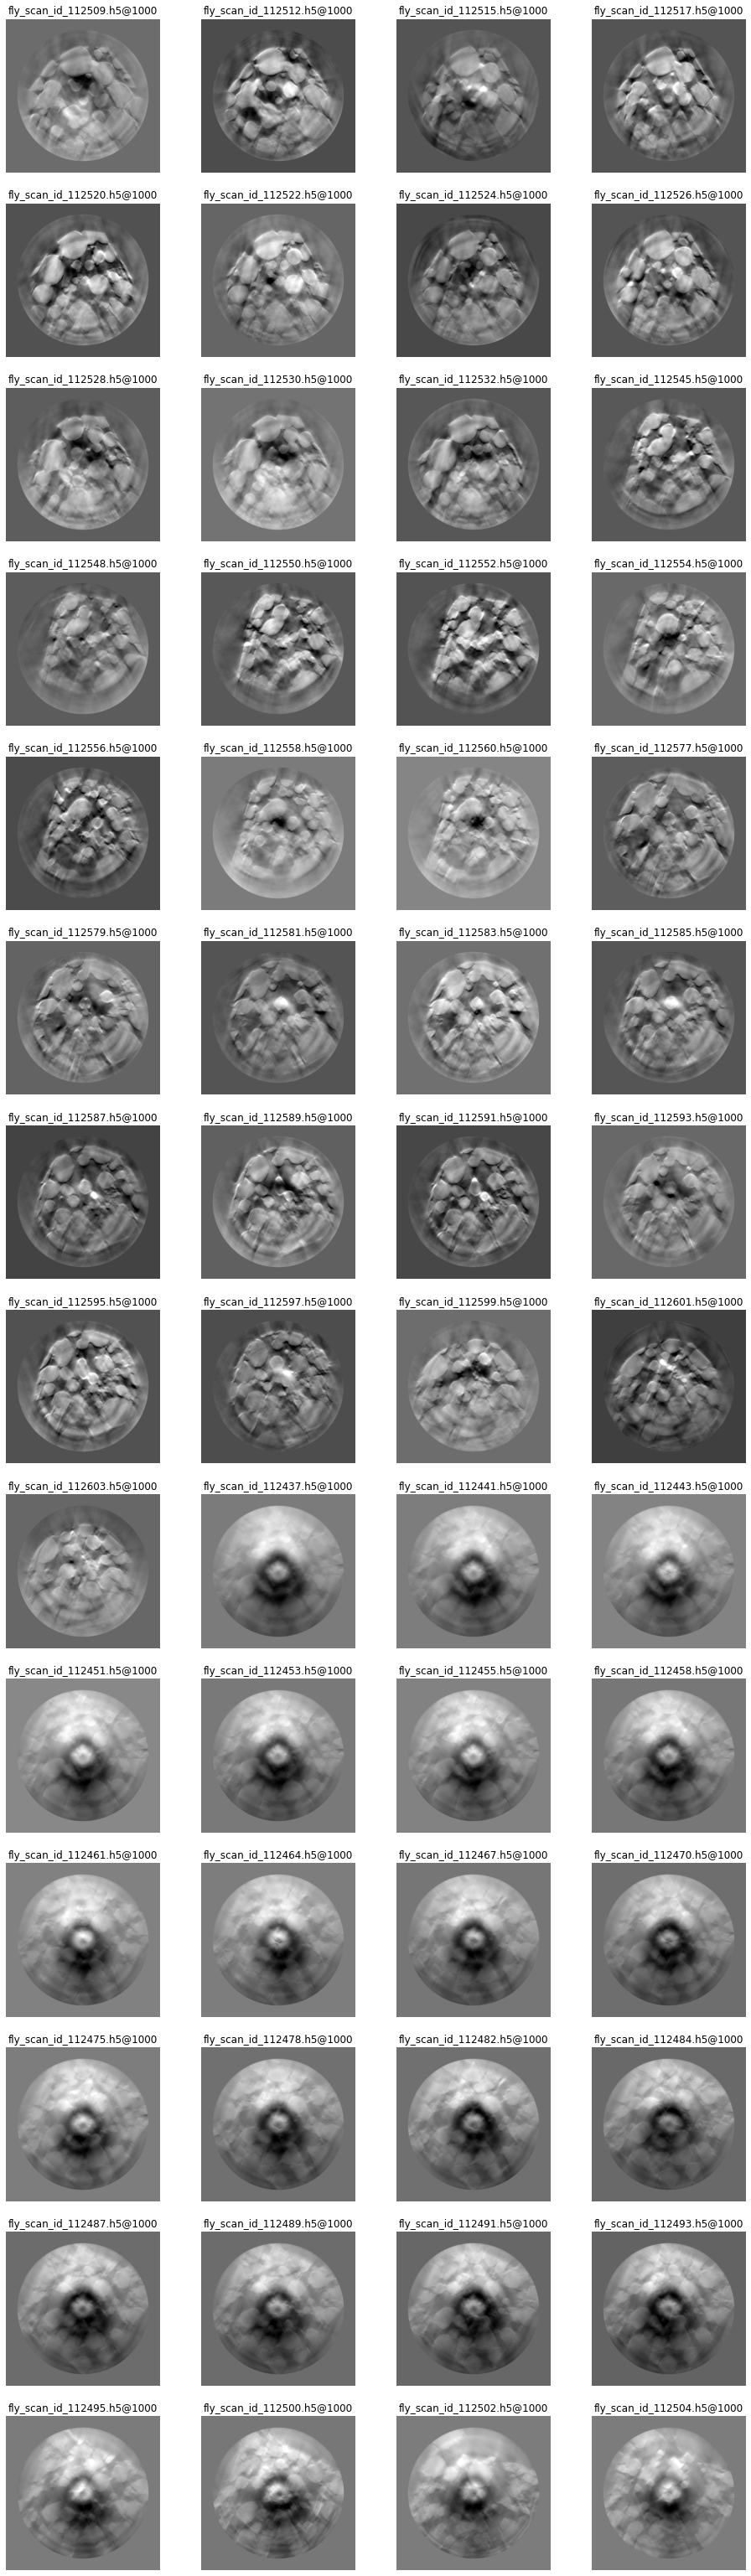

In [3]:
def GetTIFFReconstructions(offset=0):
	images=[]
	for file in files:
		remote=f"workflow/{file}/r/tif/i_{offset:05}.tiff"
		local_filename=f"/tmp/{remote}"
		DownloadObject(bucket, remote, local_filename)
		images.append({"title": f"{file}@{offset}", "img": ReadImage(local_filename)})
	return images

ShowImages(GetTIFFReconstructions(offset=1000))

# Show TIFF segmentations at a certain offset 
Note:
- segmentations are 10x smaller than reconstructions

Downloaded Object workflow/fly_scan_id_112509.h5/s/tif/i_01000.tiff in 6.362394571304321 seconds size(4000256) mb_sec(0)
Downloaded Object workflow/fly_scan_id_112512.h5/s/tif/i_01000.tiff in 4.275418281555176 seconds size(4000256) mb_sec(0)
Downloaded Object workflow/fly_scan_id_112515.h5/s/tif/i_01000.tiff in 3.151968479156494 seconds size(4000256) mb_sec(1)
Downloaded Object workflow/fly_scan_id_112517.h5/s/tif/i_01000.tiff in 6.977532148361206 seconds size(4000256) mb_sec(0)
Downloaded Object workflow/fly_scan_id_112520.h5/s/tif/i_01000.tiff in 5.808697462081909 seconds size(4000256) mb_sec(0)
Downloaded Object workflow/fly_scan_id_112522.h5/s/tif/i_01000.tiff in 3.445985794067383 seconds size(4000256) mb_sec(1)
Downloaded Object workflow/fly_scan_id_112524.h5/s/tif/i_01000.tiff in 3.1758639812469482 seconds size(4000256) mb_sec(1)
Downloaded Object workflow/fly_scan_id_112526.h5/s/tif/i_01000.tiff in 3.4111595153808594 seconds size(4000256) mb_sec(1)
Downloaded Object workflow/fly

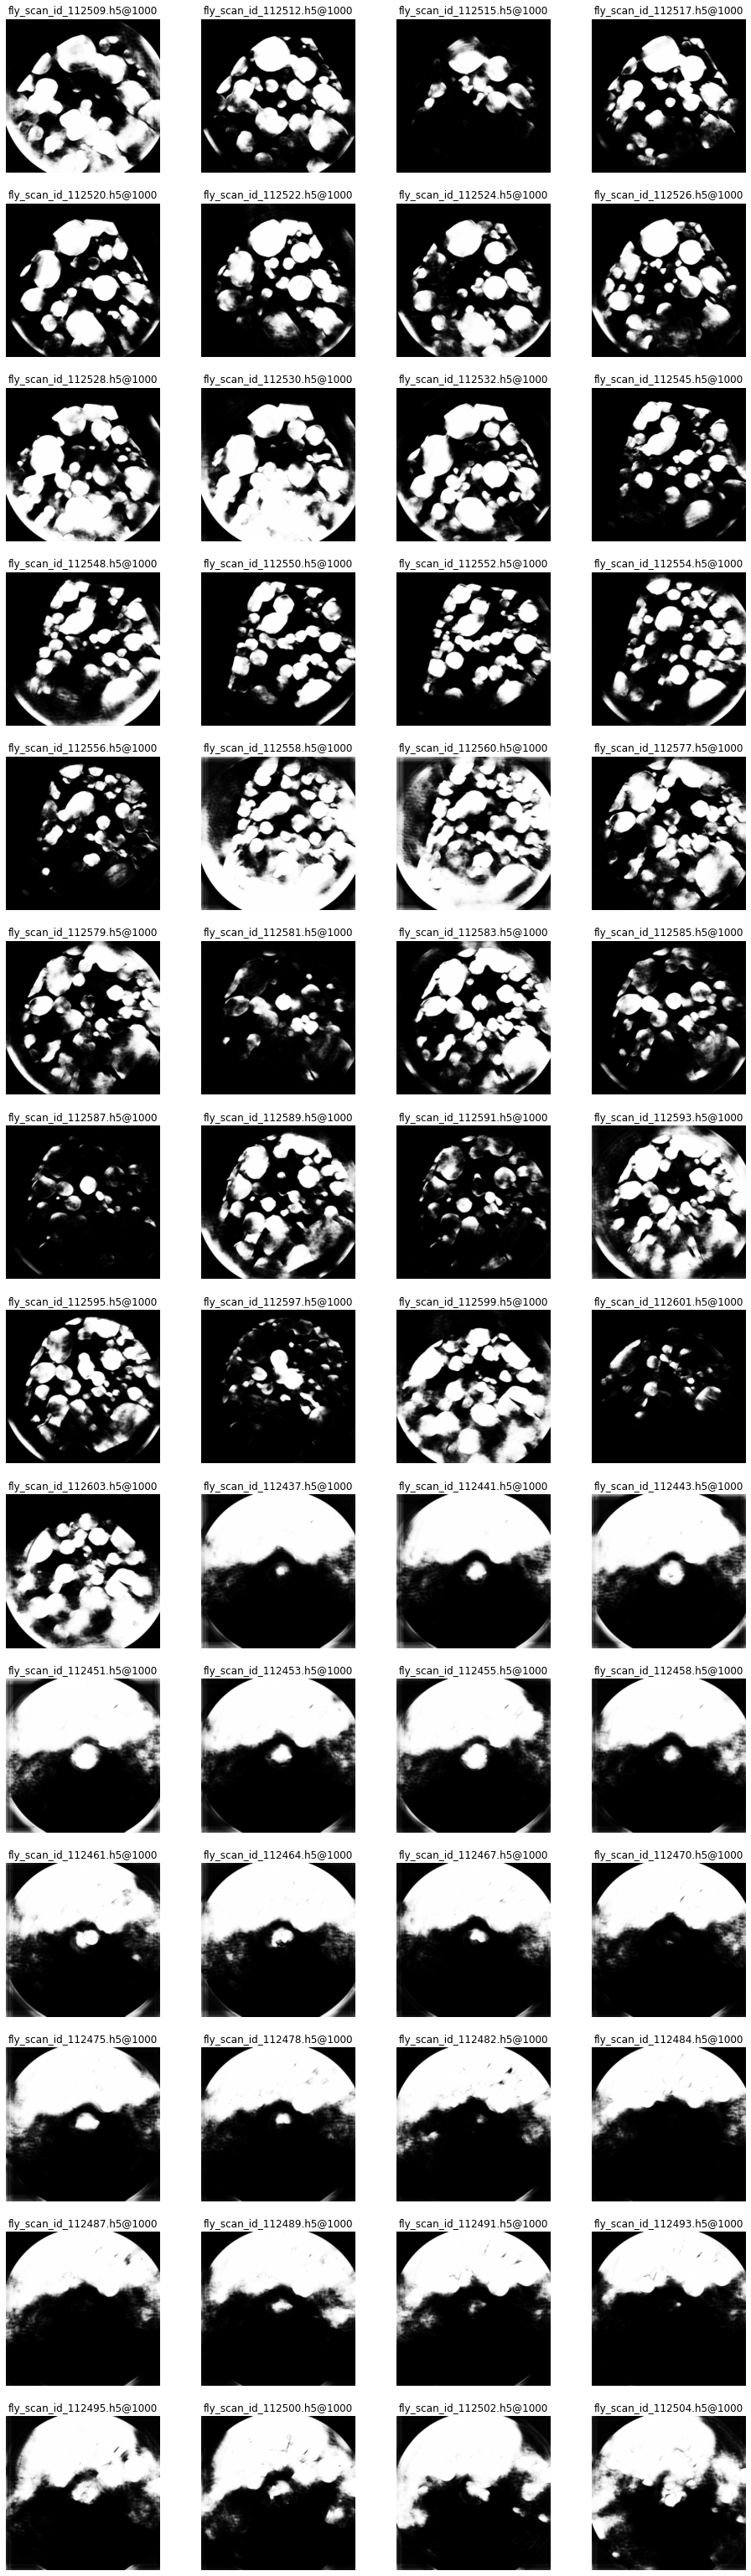

In [4]:
def GetTIFFSegmentations(offset=0):
	images=[]
	for file in files:
		remote=f"workflow/{file}/s/tif/i_{offset:05}.tiff"
		local_filename=f"/tmp/{remote}"
		DownloadObject(bucket, remote, local_filename)
		images.append({"title": f"{file}@{offset}", "img": ReadImage(local_filename)})
	return images

ShowImages(GetTIFFSegmentations(offset=1000))

# Show z-slices data using OpenVisus

Note:
- resolutions values are not optimal. We need to find better heuristics.

Starting OpenVisus /home/scrgiorgio/.local/lib/python3.8/site-packages/OpenVisus/__init__.py 3.8.10 (default, Nov 26 2021, 20:14:08) 
[GCC 9.3.0] sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0) ...
123911312 Kernel:251 11419:140086919681856 setting VISUS_HOME /home/scrgiorgio/visus from home directory
123911313 Kernel:340 11419:140086919681856 VERSION GIT_REVISION e49e5ae VisusHome /home/scrgiorgio/visus BinaryDirectory /home/scrgiorgio/.local/lib/python3.8/site-packages/OpenVisus/bin CurrentWorkingDirectory  /home/scrgiorgio/github.com/nsdf-fabric/nsdf-pania/nsdf/pania/jupyter
123911315 VisusDbPy:77 11419:140086919681856 Registering PyMultipleDataset
https://atlantis.sci.utah.edu/mod_visus?dataset=fly_scan_id_112509.h5-r
123912807 NetService:731 11419:140085039191808 GET connection 0 wait 10 running 1477 download 299  -  0 kb/sec) status STATUS_OK url https://atlantis.sci.utah.edu/mod_visus?dataset=fly%5Fscan%5Fid%5F112509%2Eh5%2Dr
bitmask V012012012012012

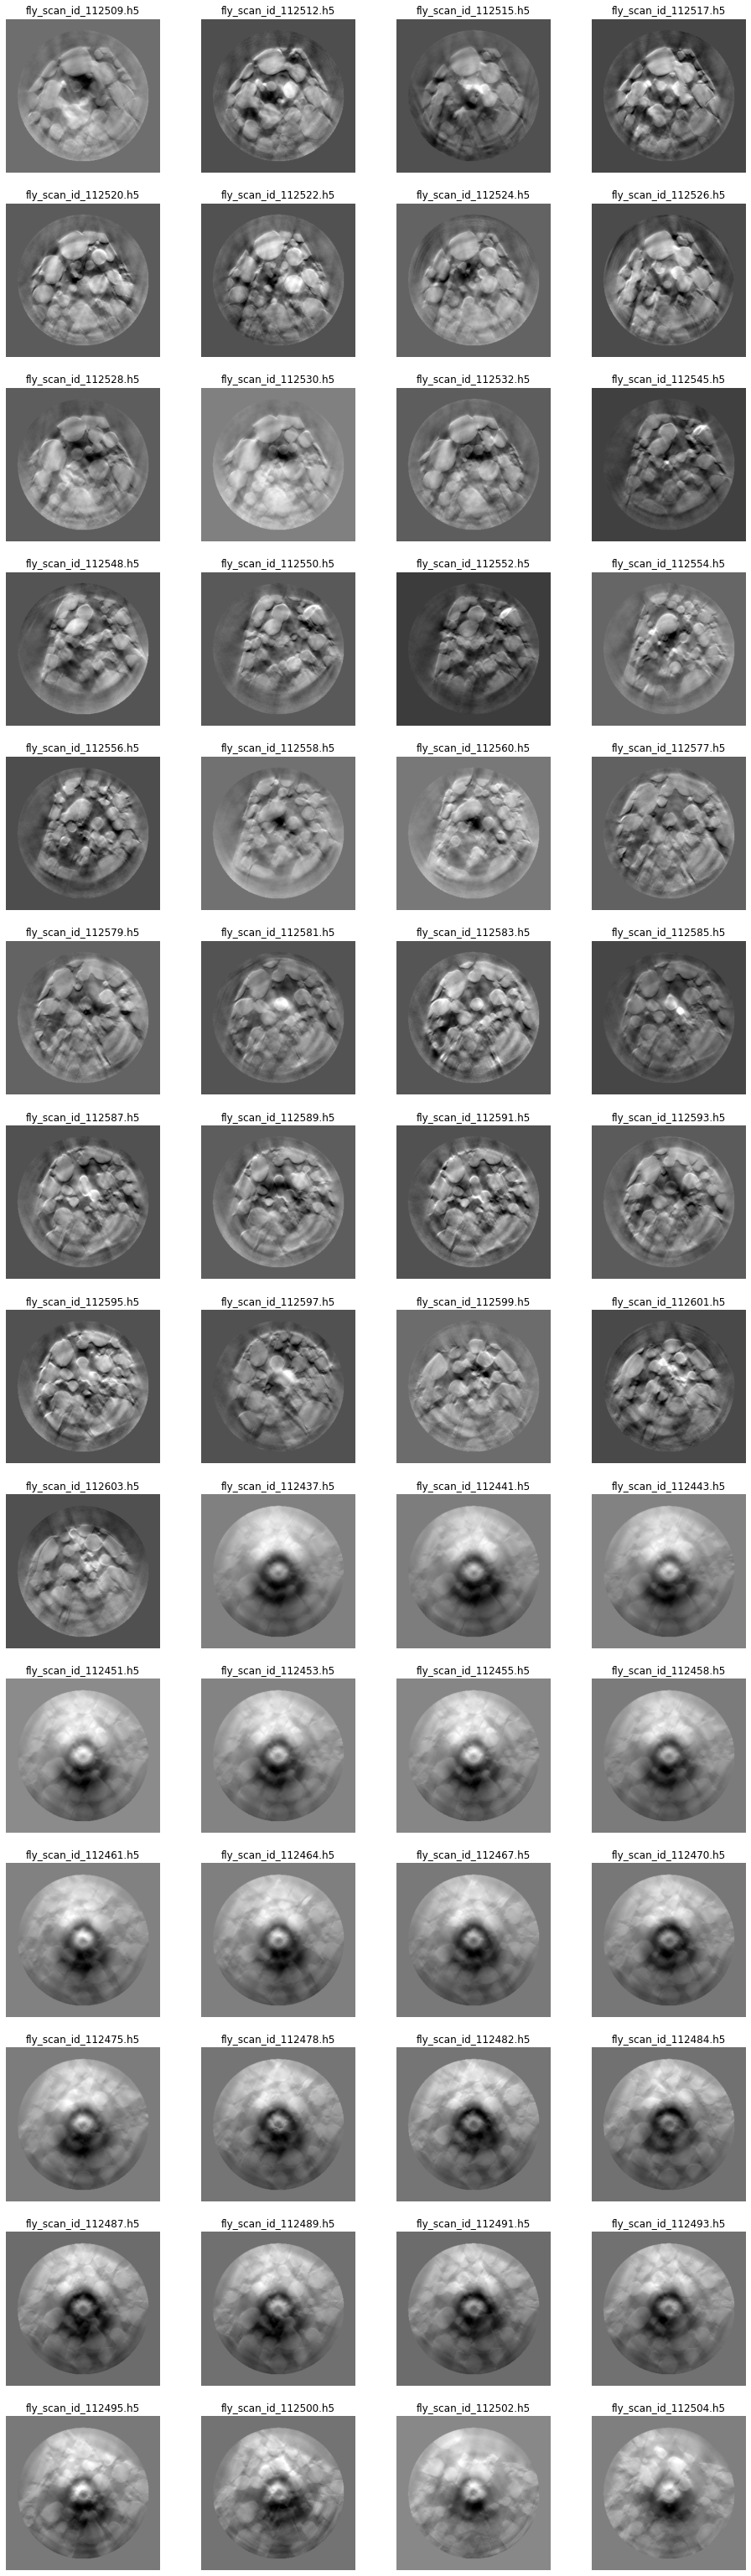

In [8]:
import OpenVisus as ov

# ///////////////////////////////////////////////////////////////////////////////////////
def ReadVisusSlice(db=None, x=None, y=None, z=None, time=None, field=None, access=None, resolution=-2, resample=False):

	"""" 
	Example:
																				 223  333
																				 890  123
		----------------------------------------------------------------
		bitmask V(012)(012)(012)(012)(012)(012)(012)(012)(012)(012)(012)

		z=[1000,1001],resolution=-0 -> H=33
		y=[1000,1001],resolution=-0 -> H= 33
		x=[1000,1001],resolution=-0 -> H= 33

		z=[1000,1001],resolution=-1 -> H= 32
		y=[1000,1001],resolution=-1 -> H= 31
		x=[1000,1001],resolution=-1 -> H= 30

		z=[1000,1001],resolution=-2 -> H= 29
		y=[1000,1001],resolution=-2 -> H= 28
		x=[1000,1001],resolution=-2 -> H= 27
	"""

	


	assert resolution<=0

	H=db.getMaxResolution()
	bitmask=db.db.getBitmask().toString()
	BOX,SIZE = db.getLogicBox(),db.getLogicSize()
	assert bitmask[0]=="V" and (len(bitmask)-1)==H

	bounds=[x,y,z]

	for A in range(3):

		if bounds[A] is None: 
			bounds[A]=[BOX[0][A],BOX[1][A]] # box is in the format [x1,y1,z1] [x2,y2,z2]
	
		if isinstance(bounds[A],int): 
			bounds[A]=[bounds[A],bounds[A]+1]

		if (bounds[A][1]-bounds[A][0])==1: 
			axis, offset=A, bounds[A][0]

		assert (bounds[A][1]-bounds[A][0])>=1

	# choose the max_resolution and align the offset
	factor=1
	for I in range(H,0,-1):
		
		# I want full resolution
		if resolution==0:
			H=I
			break

		# example: -1 means I want to 'jump' one Z bit in the bitmask (given the axis ==2)
		if ord(bitmask[I])-ord('0')==axis:
			resolution+=1
			factor*=2
			offset=(offset // factor) * factor
			bounds[axis][0]=offset
			bounds[axis][1]=offset+1

	logic_box=[
		[bounds[0][0], bounds[1][0], bounds[2][0]],
		[bounds[0][1], bounds[1][1], bounds[2][1]]
	]

	print("bitmask",bitmask,"H",H,"axis",axis,"offset",offset)
	ret = db.read(logic_box=logic_box, max_resolution=H, time=time, field=field, access=access)

	# lower the dimension to match the pdim
	if axis==0: ret=ret[:,:,0]
	if axis==1: ret=ret[:,0,:]
	if axis==2: ret=ret[0,:,:]

	# resample
	if resample==True:
		X,Y=(axis+1) % 3,(axis+2) % 3
		X,Y=min(X,Y),max(X,Y)
		resample=[SIZE[X],SIZE[Y]]

	# resample
	if	isinstance(resample,(tuple,list)) :
		from skimage.transform import resize
		ret = resize(ret, resample, preserve_range=True).astype(ret.dtype)

	return ret

# ///////////////////////////////////////////////////////////
def ReadVisusSlices(axis=2,offset=0, resolution=-2,type="r"):
	images=[]
	for file in files:
		url=f"https://atlantis.sci.utah.edu/mod_visus?dataset={file}-r"
		print(url)
		db=ov.LoadDataset(url)
		
		img=ReadVisusSlice(db=db, 
			x=offset if axis==0 else None,
			y=offset if axis==1 else None,
			z=offset if axis==2 else None, 
			resolution=resolution) 

		print("shape",img.shape)
		images.append({"title": file, "img": img})

	return images

images=ReadVisusSlices(axis=2,offset=1024,resolution=-4, type="r")
ShowImages(images)

https://atlantis.sci.utah.edu/mod_visus?dataset=fly_scan_id_112509.h5-r
124420647 NetService:731 11419:140085039191808 GET connection 0 wait 10 running 1308 download 299  -  0 kb/sec) status STATUS_OK url https://atlantis.sci.utah.edu/mod_visus?dataset=fly%5Fscan%5Fid%5F112509%2Eh5%2Dr
bitmask V012012012012012012012012012012012012 H 24 axis 0 offset 1024
124422072 NetService:731 11419:140085039191808 GET connection 0 wait 10 running 1414 download 133.4KB  -  94 kb/sec) status STATUS_OK url https://atlantis.sci.utah.edu/mod_visus?action=boxquery&box=1024%201024%200%202559%200%202159&compression=zip&dataset=fly%5Fscan%5Fid%5F112509%2Eh5%2Dr&field=data&fromh=0&maxh=36&time=0%2E000000&toh=24
shape (135, 160)
https://atlantis.sci.utah.edu/mod_visus?dataset=fly_scan_id_112512.h5-r
124422880 NetService:731 11419:140085039191808 GET connection 0 wait 10 running 796 download 299  -  0 kb/sec) status STATUS_OK url https://atlantis.sci.utah.edu/mod_visus?dataset=fly%5Fscan%5Fid%5F112512%2Eh5%2Dr


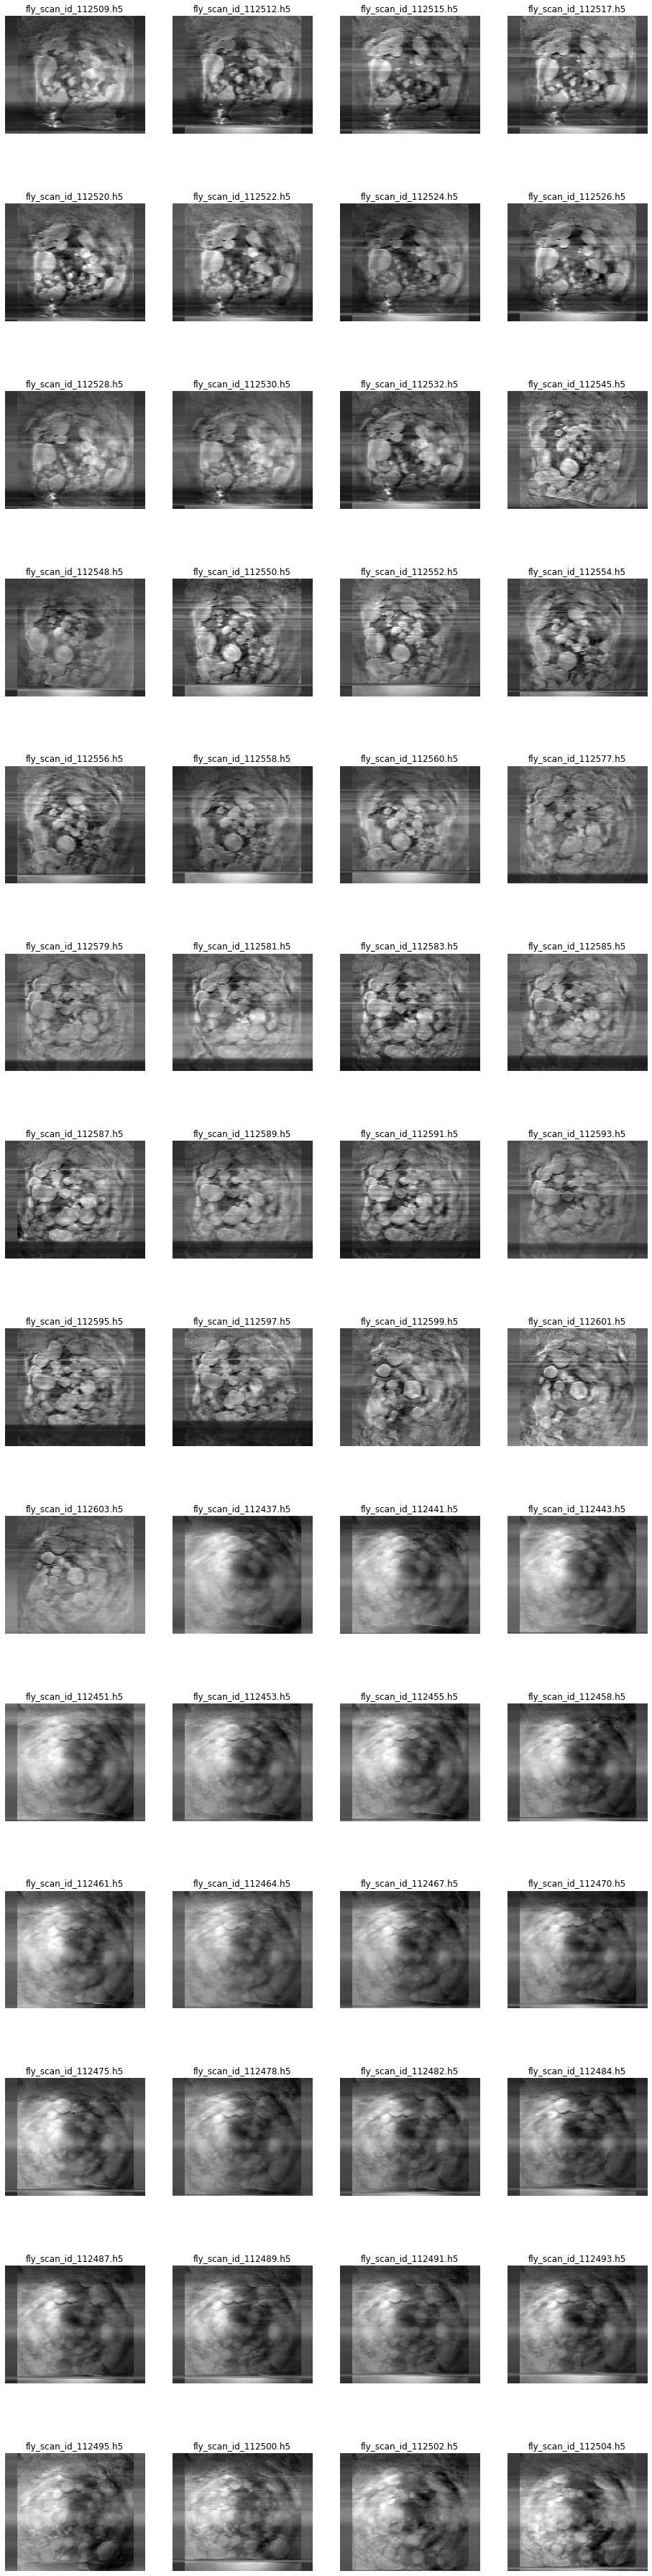

In [9]:
images=ReadVisusSlices(axis=0,offset=1024,resolution=-4, type="r")
ShowImages(images)

# Show other OpenVisus slices

125127969 NetService:731 11419:140085039191808 GET connection 0 wait 10 running 1155 download 299  -  0 kb/sec) status STATUS_OK url https://atlantis.sci.utah.edu/mod_visus?dataset=fly%5Fscan%5Fid%5F112437%2Eh5%2Dr
bitmask V012012012012012012012012012012012012 H 26 axis 2 offset 0
125130335 NetService:731 11419:140085039191808 GET connection 0 wait 10 running 2354 download 427.6KB  -  181 kb/sec) status STATUS_OK url https://atlantis.sci.utah.edu/mod_visus?action=boxquery&box=0%202559%200%202559%200%200&compression=zip&dataset=fly%5Fscan%5Fid%5F112437%2Eh5%2Dr&field=data&fromh=0&maxh=36&time=0%2E000000&toh=26
shape (320, 320)
bitmask V012012012012012012012012012012012012 H 26 axis 2 offset 96
125131917 NetService:731 11419:140085039191808 GET connection 0 wait 10 running 1569 download 428.2KB  -  272 kb/sec) status STATUS_OK url https://atlantis.sci.utah.edu/mod_visus?action=boxquery&box=0%202559%200%202559%2096%2096&compression=zip&dataset=fly%5Fscan%5Fid%5F112437%2Eh5%2Dr&field=data&

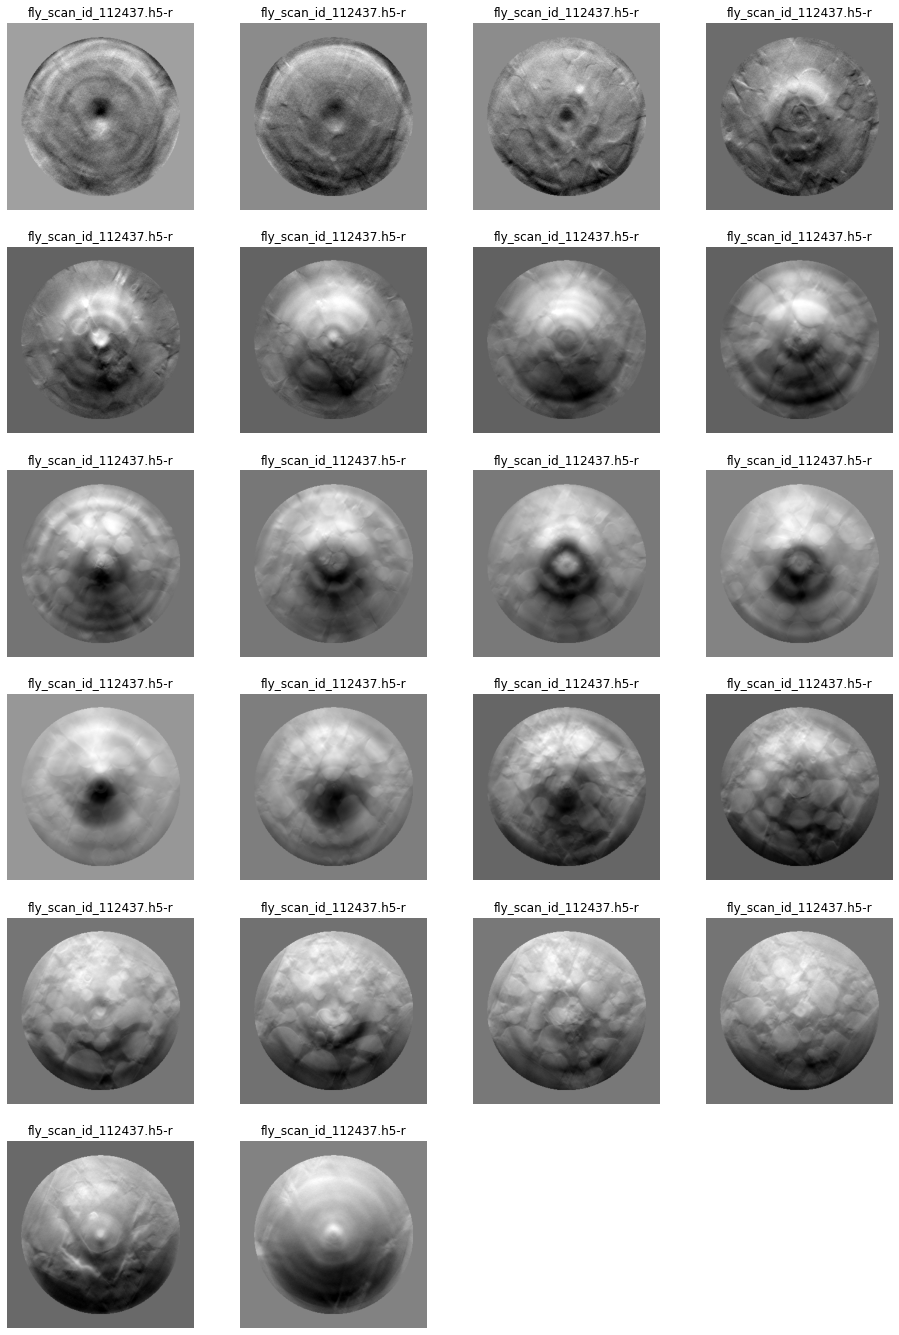

In [11]:
type="r"
key="fly_scan_id_112437.h5"
db=ov.LoadDataset(f"https://atlantis.sci.utah.edu/mod_visus?dataset={key}-{type}")

images=[]
for offset in range(0,2160,100):
	img=ReadVisusSlice(db=db, x=None, y=None,z=offset, resolution=-4) 
	print("shape",img.shape)
	images.append({"title": f"{key}-{type}", "img": img})
ShowImages(images)
